# DSCI 470 – Project 1

Due: Monday, October 3rd, 11:59pm.

In this project you will use prediction models to study house prices in Salt Lake City. We will use classification models to study the popularity of news.

## Your Data
Fill out the following information: 

*First Name: Blaine*   
*Last Name: Mason*  


## Part 1a: Gradient Descent
Using the mglearn make wave function with 100 samples, create a linear regression model $f$ using gradient descent that predicts the target value given the single feature. Your model should be of the form 

$$
f_{w,b}(\text{target}) = w*x+b, 
$$
where $x$ is feature. 

Remeber Gradient Descent utilizes the least squares cost function:

$$
J(w,b)=\frac{1}{2m} \sum_{i=1}^m (f_{w,b}(x_i)-y_i)^2
$$

and we want to update:

$$
w=w-\alpha \frac{\partial}{\partial w}J(w,b)
$$
$$
b=b-\alpha \frac{\partial}{\partial b}J(w,b)
$$
**Question 1**: intilize your Gradient Descent algortihm. Choose a few different alpha values and use a countour diagram along with the parameters from each step of the algorithm to visualize what happens when the alpha value is to big or to small

**Question 2**: Pick the alpha value that gets you closest to the minimum in the fewest steps. Plot a scatter plot of the data and your model. Calculate the R squared value and report your interpertation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn as m
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data" 
_df=pd.read_csv(url, header=None)
x,y = m.datasets.make_wave(n_samples=100)
x = x.reshape(1,-1)[0]
def Cost(w,b,x,y):
    # We take in a w,b value and a vector of features x and the target y#
    
    C=.5*np.sum(((w*x+b)-y)**2)
    
    return C
def f(x,w,b):
    return w*x + b

def gradientDescent(x, y, theta, learn_rate, N, n_iter):
    loss_i = np.zeros(n_iter)
    for i in range(n_iter):
        w = theta[0]
        b = theta[1]
        yhat = w*x+b
        loss = np.sum((yhat-y)** 2)/(2)
        loss_i[i] = loss
        #print("i:%d, loss: %f" % (i, loss))

        gradient_w = np.dot(x,(yhat-y).T)
        gradient_b = np.sum((yhat-y))
        w = w - learn_rate*gradient_w
        b = b - learn_rate*gradient_b
        theta = [w,b]
    return w,b,loss_i
regression = []
for alpha in np.arange(.001, .00001, -.00001):
    w,b, loss = gradientDescent(x.T,y,np.zeros(2),alpha, x.shape[0],100)
    regression.append(loss[-1])

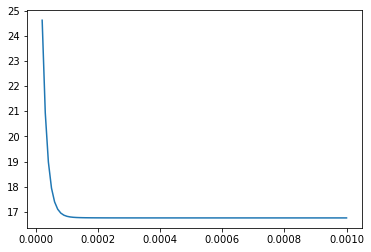

In [2]:
plt.plot([i for i in np.arange(.001, .00001, -.00001)], regression)

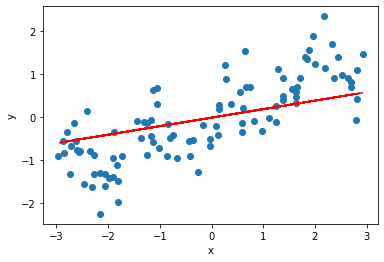

In [3]:
plt.scatter(x,y)
plt.xlabel("x");
plt.ylabel("y");
plt.plot(x, [w*a + b for a in x], 'r--')

## Part 1b: Regression of real estate data
For this problem, you will analyze SLC real estate data. The dataset contains multiple listing service (MLS) real estate transactions for houses sold in 2015-16 in zip code 84103 ([SLC avenues neighborhood](https://www.google.com/maps/place/Salt+Lake+City,+UT+84103/@40.8030372,-111.8957957,12z/data=!3m1!4b1!4m5!3m4!1s0x87525f672006dded:0x311e638d9a1a2de5!8m2!3d40.810506!4d-111.8449346)). We are primarily interested in regressing the `SoldPrice` on the house attributes (`property size`, `house size`, `number of bedrooms`, etc...). 


### Task 1.1: Import the data 
Use the [`pandas.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to import the dataset. The data is contained in two files located in the same directory as this notebook: [`train1.csv`](train1.csv) and [`train2.csv`](train2.csv). After you import these files separately, concatenate them into one big dataframe. This pandas dataframe will be used for data exploration and linear regression. 

In [4]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
sns.set()

# imports ski-kit modules
from sklearn import tree, svm, metrics
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (15, 11) 

In [5]:
df = pd.concat([pd.read_csv("train1.csv"),pd.read_csv("train2.csv")])
df.head()

ListNo    Access  AdditInfo  Acres             ListAgt  \
0  1397571  Concrete        NaN   0.29          Liz Slager   
1  1394021   Asphalt        NaN   0.01      Angela Carlson   
2  1393604       NaN        NaN   0.11     Rachel Kitterer   
3  1393602  Concrete        NaN   0.14     Rachel Kitterer   
4  1393829   Asphalt        NaN   0.01  T. Carter Maudsley   

                 AirType                                          Amenities  \
0  Central Air; Electric  See Remarks; Cable Tv Available; Cable Tv Wire...   
1  Central Air; Electric          Cable Tv Available; Electric Dryer Hookup   
2  Central Air; Electric              Cable Tv Wired; Electric Dryer Hookup   
3  Central Air; Electric              Cable Tv Wired; Electric Dryer Hookup   
4  Central Air; Electric                                     Cable Tv Wired   

   Area  BackDim                            Basemnt  ...  WinEvp1 WinEvp2  \
0   101      0.0  Daylight; Entrance; Full; Walkout  ...        0       0   
1   101      0.0                   None/Crawl Space  ...        0       0   
2   101      0.0                               Full  ...        0       0   
3   101      0.0                               Full  ...        0       0   
4   101      0.0                   None/Crawl Space  ...        0       0   

  WinEvp3 WinEvp4                       Window    WithDrDt YearBlt    Zip  \
0       0       0                       Blinds  00/00/0000    1998  84103   
1       0       0  Blinds; Plantation Shutters  00/00/0000    1965  84103   
2       0       0  Blinds; Plantation Shutters  00/00/0000    1940  84103   
3       0       0                       Blinds  00/00/0000    1940  84103   
4       0       0                          NaN  00/00/0000    1969  84103   

  Zoning     LastMod  
0    NaN  08/29/2016  
1    RES  08/22/2016  
2    NaN  08/29/2016  
3    NaN  08/29/2016  
4    NaN  08/18/2016  

[5 rows x 206 columns]

### Task 1.2: Clean the data 

1. There are 206 different variables associated with each of the 348 houses in this dataset. Skim them and try to get a rough understanding of what information this dataset contains. If you've never seen a real estate listing before, you might take a look at one on [this](http://www.utahrealestate.com/) website to get a better sense of the meanings of the column headers in the dataset.  

+ Only keep houses with List Price between 250,000 and 1,000,000 dollars. This is an arbitrary choice and we realize that some people are high rollers, but for our purposes we'll consider the others as outliers. 

+ Remove columns that you don't think contribute to the value of the house. This is a personal decision – what attributes of a house are important to you? 
You should at least keep the following variables since the questions below will use them: 
`['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'DaysOnMkt', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']` 

+ Check the datatypes and convert any numbers that were read as strings to numerical values. (Hint: You can use [`str.replace()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html) to work with strings.) If there are any categorical values you're interested in, then you should convert them to numerical values. In particular, convert 'TotSqf' to an integer and add a column titled `Prop_Type_num` that is 
$$
\text{Prop_Type_num}_i = \begin{cases} 
0 & \text{if $i$-th listing is a condo or townhouse} \\
1 & \text{if $i$-th listing is a single family house}
\end{cases}. 
$$
+ Remove the listings with erroneous `Longitude` (one has Longitude = 0) and `Taxes` values (two have unreasonably large values).

In [6]:
parsed_df = df[['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'DaysOnMkt', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]

In [7]:
parsed_df.head()

Acres  Deck  GaragCap   Latitude   Longitude  DaysOnMkt  LstPrice  Patio  \
0   0.29     1         3  40.779524 -111.893542        7.0    725000      1   
1   0.01     0         0  40.773243 -111.883291        5.0    205000      0   
2   0.11     0         0  40.773972 -111.867470        4.0    390000      1   
3   0.14     0         1  40.783009 -111.872100       12.0    445000      1   
4   0.01     0         0  40.775055 -111.867840        2.0    165000      1   

   PkgSpacs       PropType  SoldPrice  Taxes  TotBed  TotBth TotSqf  YearBlt  
0         0  Single Family     752000   7244     4.0     5.0  5,415     1998  
1         0          Condo     205000   1431     2.0     1.0    924     1965  
2         0  Single Family     390000   1816     3.0     1.0  1,702     1940  
3         3  Single Family     443000   3260     3.0     2.0  1,756     1940  
4         0          Condo     163000    942     2.0     1.0    720     1969

In [8]:
parsed_df['Acres'] = parsed_df['Acres'].astype(float)
parsed_df['Deck'] = parsed_df['Deck'].astype(int)
parsed_df['GaragCap'] = parsed_df['GaragCap'].astype(int)
parsed_df['Latitude'] = parsed_df['Latitude'].astype(float)
parsed_df['Longitude'] = parsed_df['Longitude'].astype(float)
parsed_df['DaysOnMkt'] = parsed_df['DaysOnMkt'].astype(float)
parsed_df['LstPrice'] = parsed_df['LstPrice'].astype(int)
parsed_df['Patio'] = parsed_df['Patio'].astype(int)
parsed_df['PkgSpacs'] = parsed_df['PkgSpacs'].astype(int)
parsed_df['PropType'].replace(['Condo', 'Townhouse','Single Family'],
                        [0, 0, 1], inplace=True)
parsed_df['SoldPrice'] = parsed_df['SoldPrice'].astype(int)
parsed_df['Taxes'] = parsed_df['Taxes'].astype(int)
parsed_df['TotBed'] = parsed_df['TotBed'].astype(float)
parsed_df['TotBth'] = parsed_df['TotBth'].astype(float)
parsed_df['TotSqf'] = parsed_df['TotSqf'].str.replace(',', '').astype(int)
parsed_df['YearBlt'] = parsed_df['YearBlt'].astype(int)
parsed_df = parsed_df.drop(parsed_df[parsed_df['Taxes'] >= 90000].index)
parsed_df = parsed_df.drop(parsed_df[parsed_df['Longitude'] == 0].index)

<ipython-input-8-7bbd34ce0e73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parsed_df['Acres'] = parsed_df['Acres'].astype(float)
<ipython-input-8-7bbd34ce0e73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parsed_df['Deck'] = parsed_df['Deck'].astype(int)
<ipython-input-8-7bbd34ce0e73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [9]:
parsed_df.dropna(inplace=True)

### Task 1.3: Exploratory data analysis 

1. Explore the dataset. Write a short description of the dataset describing the number of items, the number of variables and check to see if the values are reasonable. 

+ Make a bar chart showing the breakdown of the different types of houses (single family, townhouse, condo). 

+ Compute the correlation matrix and use a heat map to visualize the correlation coefficients. 
    - Use a diverging color scale from -1 to +1 (see `vmin` and `vmax` parameters for [pcolor](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.pcolor.html))
    - Show a legend
    - Make sure the proper labels are visible and readable (see [`xticks`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.xticks.html) and the corresponding [`yticks`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.yticks.html).

+ Make a scatter plot matrix to visualize the correlations. Color-code the dots by property type. For the plot, only use a subset of the columns: `['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']`. Determine which columns have strong correlations. 

+ Describing your findings. 


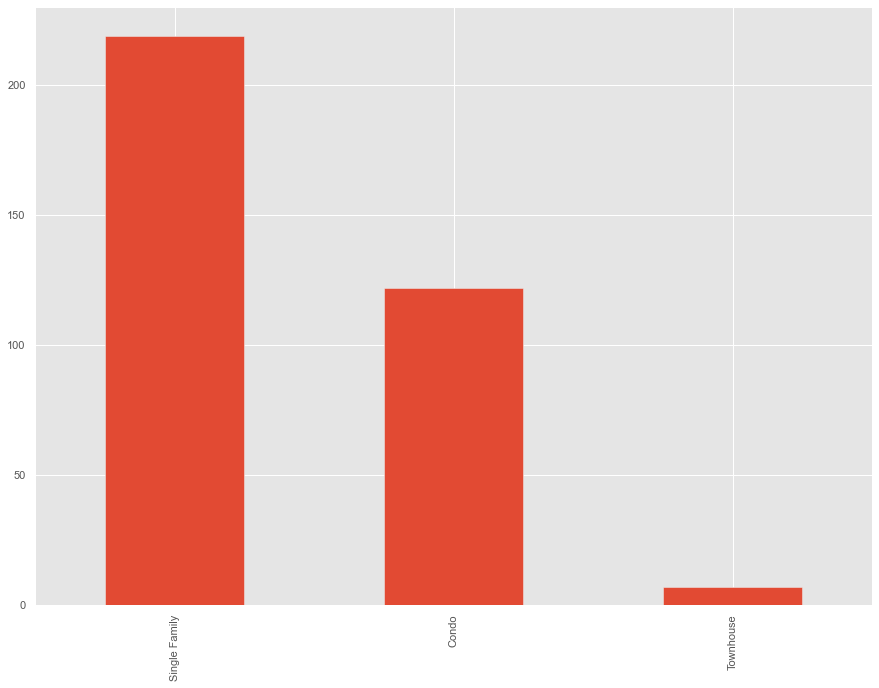

In [10]:
df['PropType'].value_counts().plot(kind='bar');

In [11]:
corr = parsed_df.corr()
parsed_df.corr()

Acres      Deck  GaragCap  Latitude  Longitude  DaysOnMkt  \
Acres      1.000000  0.126849  0.413143  0.161160   0.214292   0.084835   
Deck       0.126849  1.000000  0.158789  0.176427   0.058190   0.010191   
GaragCap   0.413143  0.158789  1.000000  0.263393   0.304010   0.188994   
Latitude   0.161160  0.176427  0.263393  1.000000  -0.255606  -0.012116   
Longitude  0.214292  0.058190  0.304010 -0.255606   1.000000   0.008547   
DaysOnMkt  0.084835  0.010191  0.188994 -0.012116   0.008547   1.000000   
LstPrice   0.631413  0.182695  0.683690  0.252092   0.460437   0.159367   
Patio      0.023212  0.728085  0.009114 -0.012725   0.077276  -0.036825   
PkgSpacs  -0.009971  0.035369  0.015457  0.117135   0.053768   0.054365   
PropType   0.208104  0.122669  0.290343  0.275920   0.407301  -0.125391   
SoldPrice  0.562315  0.185436  0.687907  0.270202   0.467508   0.155648   
Taxes      0.258887  0.171768  0.630503  0.312339   0.390674   0.284818   
TotBed     0.197052  0.146748  0.507089  0.295538   0.415557   0.133962   
TotBth     0.362755  0.153742  0.716220  0.265590   0.363815   0.272084   
TotSqf     0.596674  0.199300  0.716906  0.335192   0.436452   0.181030   
YearBlt    0.101610  0.118912  0.354269  0.301269  -0.159263   0.213188   

           LstPrice     Patio  PkgSpacs  PropType  SoldPrice     Taxes  \
Acres      0.631413  0.023212 -0.009971  0.208104   0.562315  0.258887   
Deck       0.182695  0.728085  0.035369  0.122669   0.185436  0.171768   
GaragCap   0.683690  0.009114  0.015457  0.290343   0.687907  0.630503   
Latitude   0.252092 -0.012725  0.117135  0.275920   0.270202  0.312339   
Longitude  0.460437  0.077276  0.053768  0.407301   0.467508  0.390674   
DaysOnMkt  0.159367 -0.036825  0.054365 -0.125391   0.155648  0.284818   
LstPrice   1.000000  0.044738  0.061765  0.441293   0.993960  0.740350   
Patio      0.044738  1.000000 -0.018133  0.117722   0.048707  0.031338   
PkgSpacs   0.061765 -0.018133  1.000000  0.278778   0.063228  0.069023   
PropType   0.441293  0.117722  0.278778  1.000000   0.464881  0.397988   
SoldPrice  0.993960  0.048707  0.063228  0.464881   1.000000  0.780947   
Taxes      0.740350  0.031338  0.069023  0.397988   0.780947  1.000000   
TotBed     0.568214  0.060093  0.224387  0.637964   0.596696  0.613307   
TotBth     0.752738  0.008981  0.152227  0.425622   0.768473  0.766471   
TotSqf     0.857104  0.040178  0.148315  0.543663   0.853070  0.730613   
YearBlt    0.135523 -0.031717 -0.215403 -0.486164   0.132784  0.213385   

             TotBed    TotBth    TotSqf   YearBlt  
Acres      0.197052  0.362755  0.596674  0.101610  
Deck       0.146748  0.153742  0.199300  0.118912  
GaragCap   0.507089  0.716220  0.716906  0.354269  
Latitude   0.295538  0.265590  0.335192  0.301269  
Longitude  0.415557  0.363815  0.436452 -0.159263  
DaysOnMkt  0.133962  0.272084  0.181030  0.213188  
LstPrice   0.568214  0.752738  0.857104  0.135523  
Patio      0.060093  0.008981  0.040178 -0.031717  
PkgSpacs   0.224387  0.152227  0.148315 -0.215403  
PropType   0.637964  0.425622  0.543663 -0.486164  
SoldPrice  0.596696  0.768473  0.853070  0.132784  
Taxes      0.613307  0.766471  0.730613  0.213385  
TotBed     1.000000  0.725832  0.743607 -0.063218  
TotBth     0.725832  1.000000  0.865502  0.212242  
TotSqf     0.743607  0.865502  1.000000  0.119384  
YearBlt   -0.063218  0.212242  0.119384  1.000000

<AxesSubplot:>

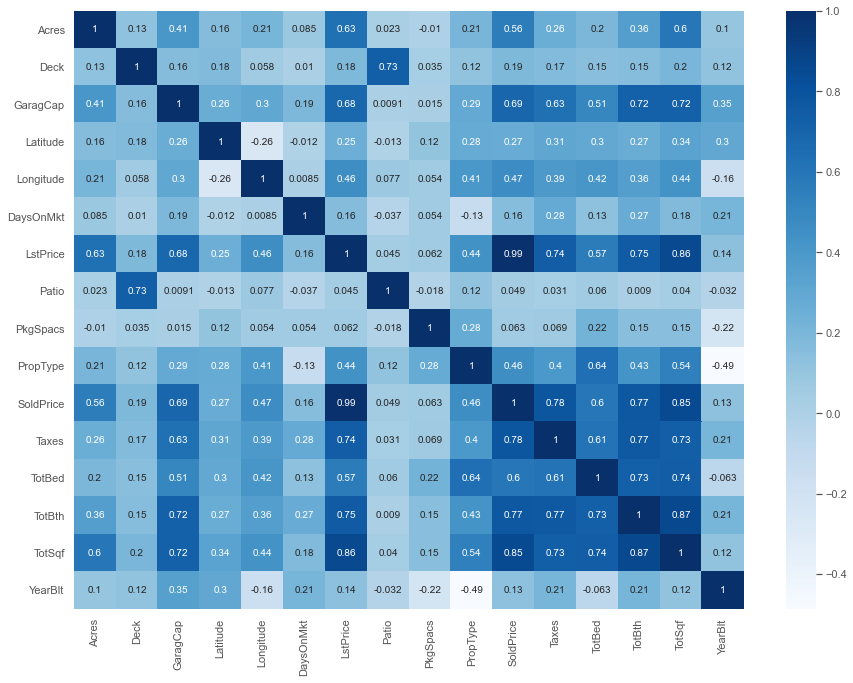

In [12]:
sns.heatmap(corr, cmap="Blues", annot=True, fmt='.2g')

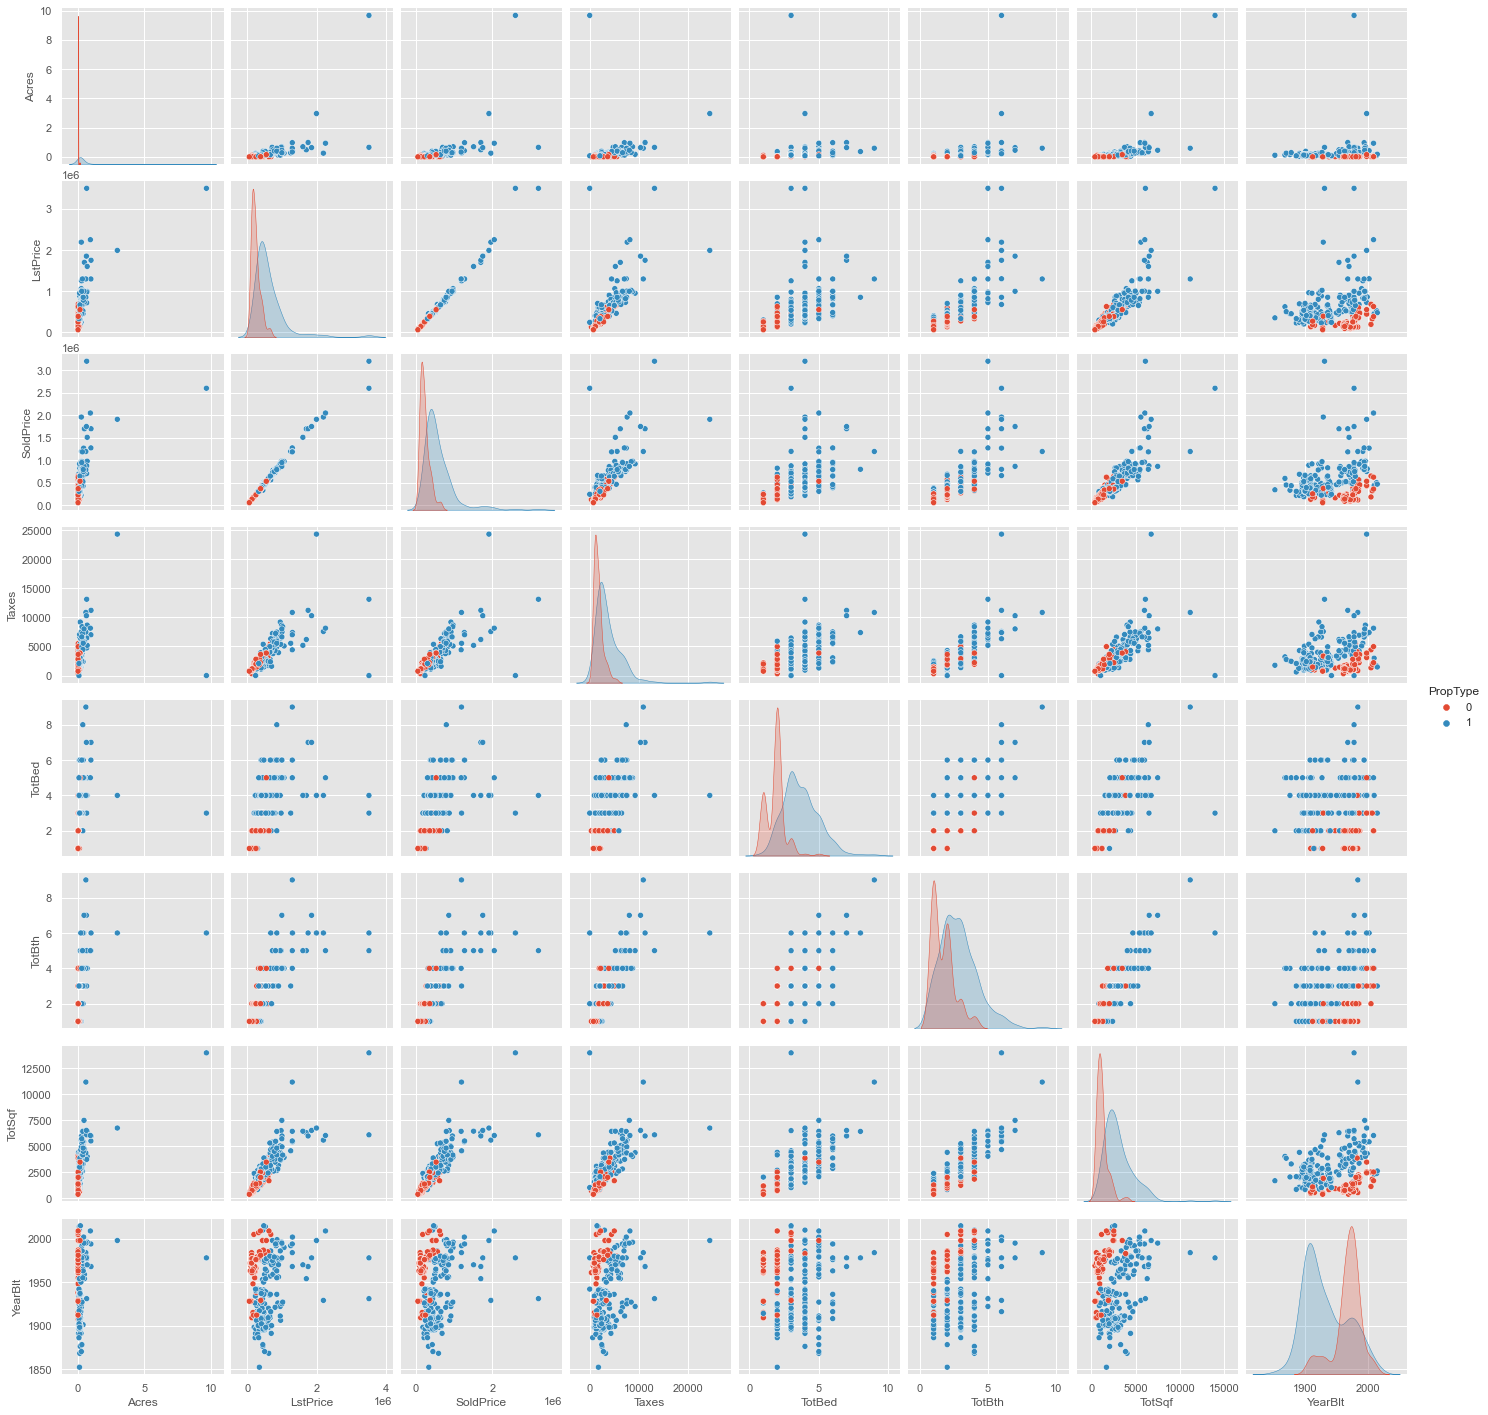

In [13]:
scatter_df = parsed_df[['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'PropType', 'TotBth', 'TotSqf', 'YearBlt']]
sns.pairplot(scatter_df, hue="PropType");


**Your Interpretation:** TODO

### Task 1.4: Geospatial plot
Two of the variables are the latitude and longitude of each listing. Salt Lake City is on this nice east-west, north south grid, so even a simple plot of lat and long makes sense. Create a scatterplot of these two variables. Use color to indicate the price of the house. How does the price depend on the house location?

What can you say about the relation between the location and the house price?
 

In [14]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


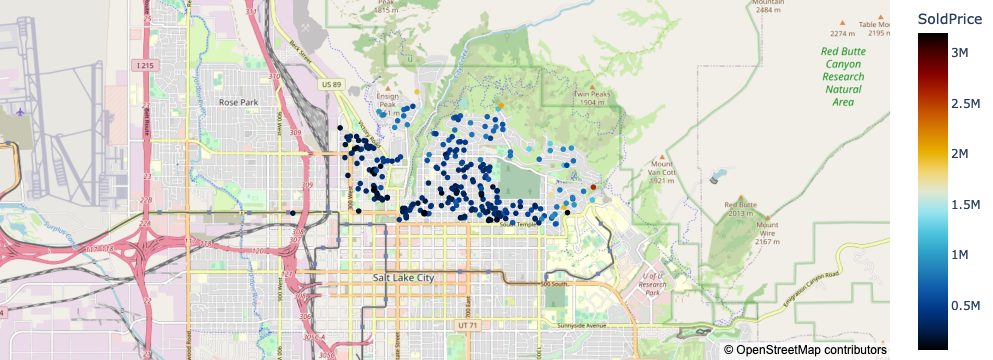

In [15]:
import plotly.express as px
geo = parsed_df[['Latitude', 'Longitude', 'SoldPrice']]
fig = px.scatter_mapbox(geo, lat="Latitude", lon="Longitude", color="SoldPrice",
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=11.5)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Your Interpretation:** TODO

### Task 1.5: Machine Learning K-Nearest Neighbors (KNN)

Develop a k-NN regression model for predicting selling price from Taxes. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? Plot graph of accuracy with various values of k to show your result


In [16]:
import mglearn
knn_data = parsed_df[["Taxes", "SoldPrice"]]
X_ = knn_data["Taxes"].values.reshape(1, -1).T
y_ = knn_data["SoldPrice"].values.reshape(1, -1).T
n=1
model = KNeighborsRegressor(n_neighbors=n)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, random_state=0)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [18]:
print("Test set R^2: {:.2f}".format(model.score(X_test, y_test)))

Test set R^2: 0.67


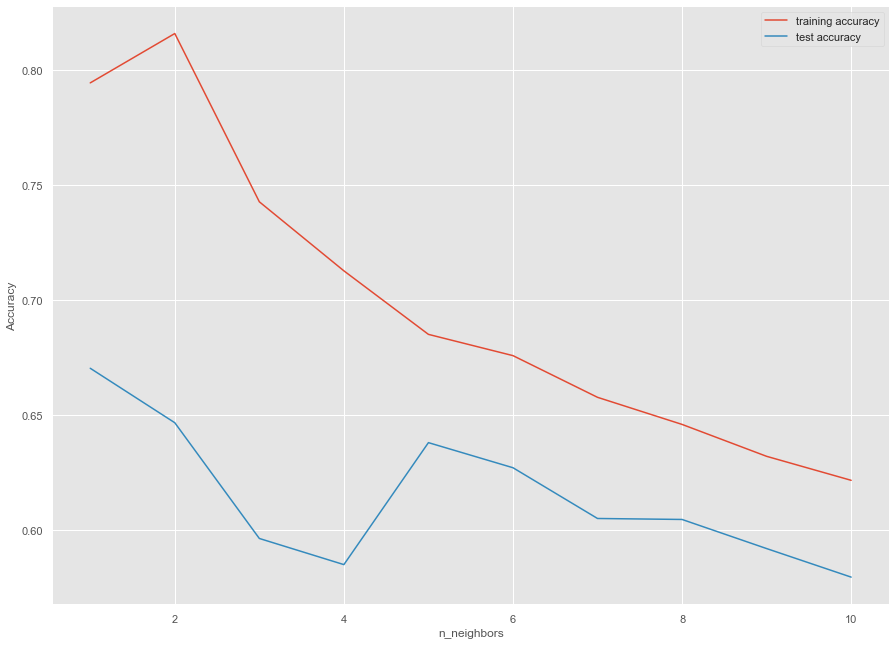

In [19]:
test_accuracy = []
training_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    # record training set accuracy 
    training_accuracy.append(clf.score(X_train, y_train)) 
    # record generalization accuracy 
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

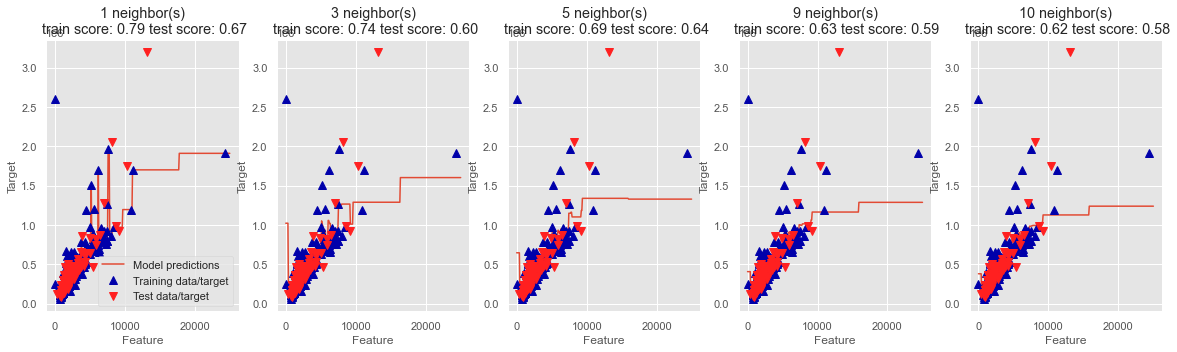

In [20]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
rmse_val = [] #to store rmse values for different k
line = np.linspace(0, 25000, 323)[:, np.newaxis]
for n, ax in zip([1, 3, 5, 9,10], axes):
    model = KNeighborsRegressor(n_neighbors=n)
    y = model.fit(X_train, y_train).predict(line)
    error = np.sqrt(mean_squared_error(y_,y)) #calculate rmse
    rmse_val.append(model.score(X_train, y_train)) #store rmse values
    ax.plot(line, model.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n, model.score(X_train, y_train), model.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target",
                    "Test data/target"], loc="best")
#     plt.scatter(X_, y_, color="darkorange", label="data")
#     plt.plot(T, y, color="navy", label="prediction")
#     plt.axis("tight")
#     plt.legend()
#     plt.title("KNeighborsRegressor (k = %i)" % (n))

### Task 1.6: Machine Learning Linear Regression 

Use the linear regression model from the sklearn package to regress the Sold price based on the Taxes. Your model should be of the form:
$$
\text{Sold Price} = \beta_0 + \beta_1 x, 
$$
where $x$ is the Taxes for the property. 

Report the R-squared value for this model (`SoldPrice ~ Taxes`) and give an interpretation for its meaning. Also give an interpretation of $\beta_1$ for this model. Make a scatterplot of Taxes vs. sold price and overlay the prediction coming from your regression model. Which model preforms better KNN or regression? 

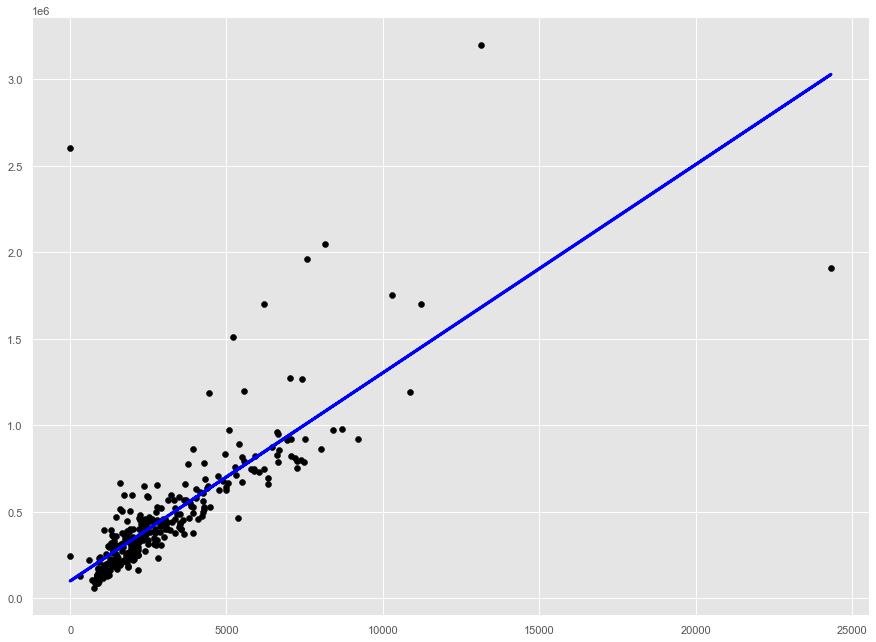

In [21]:
reg_data = parsed_df[["SoldPrice", "Taxes"]]
X_ = reg_data["Taxes"].values.reshape(1, -1).T
y_ = reg_data["SoldPrice"].values.reshape(1, -1).T

reg = LinearRegression().fit(X_, y_)

y_pred = reg.predict(X_)

plt.scatter(X_, y_, color="black")
plt.plot(X_, y_pred, color="blue", linewidth=3)
plt.show()

In [22]:
reg.score(X_test, y_test)

0.740329253323879

**Your Interpretation:** TODO

### Task 1.7: Multilinear Regression 
Develop a multilinear regression model for house prices in this neighborhood. We could use this to come up with a list price for houses coming on the market, so do not include the list price in your model and, for now, ignore the categorical variable Prop_Type. Your model should be of the form:
$$
\text{Sold Price} = b + w_1 x_1 + w_2 x_2 + \cdots +  w_n x_n, 
$$
where $x_i$ are predictive variables.


**Question 1**: If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare? 

Next look at the difference between list price and sold price explicitly. Calculate two new columns for your dataset. `DiffPriceAbsolute` and `DiffPriceRelative`.

* `DiffPriceAbsolute` - This is difference between sold price and list price. If it is positive, that means the house sold for more than it was listed at.
* `DiffPriceRelative` - This is the relative difference between sold price and list price. A value of 1.1 here means that the house sold for 110% of the asking price, and 0.9 means the house sold for 90% of the asking price.

Now, create two new models. One to predict `DiffPriceAbsolute`, and one to predict `DiffPriceRelative`. Use the same predictive variables as in the last model.


**Question 2**: Which of these two new models makes better predictions.

**Question 3**: Based on your answer to question two, why are these models different/the same.

To help justify your answer to question 3, train two models to predict `DiffPriceAbsolute` and `DiffPriceRelative` based on just `SoldPrice`. In addition, for each model make a scatterplots similar to Task 6 for these models.

In [23]:
y = parsed_df['LstPrice']
X = parsed_df[['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'DaysOnMkt', 'Patio', 'PkgSpacs', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)
regressor.score(X_test, y_test)

     Actual      Predicted
119  850000  868112.519921
71   134900  142107.774268
18   359000  384042.847389
97   313900  324054.882184
155  949000  933158.568639
..      ...            ...
174  474900  506738.952679
50   448690  443328.934916
134  215000  215001.556312
45   180000  185546.298851
113  459000  481154.739037

[81 rows x 2 columns]


0.9968663314372026

In [25]:
parsed_df.insert(len(parsed_df.columns), "DiffPriceAbsolute", parsed_df['LstPrice'] - parsed_df['SoldPrice'])
parsed_df.insert(len(parsed_df.columns), "DiffPriceRelative", (parsed_df['SoldPrice'] - parsed_df['LstPrice'])/parsed_df['LstPrice'])

In [26]:
y = parsed_df['DiffPriceAbsolute']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)
regressor.score(X_test, y_test)

     Actual     Predicted
119   25000  43112.519921
71        0   7207.774268
18    -9000  16042.847389
97        0  10154.882184
155   29000  13158.568639
..      ...           ...
174    4900  36738.952679
50        0  -5361.065084
134    2500   2501.556312
45    -6000   -453.701149
113   -8000  14154.739037

[81 rows x 2 columns]


0.5882163240864519

In [27]:
y = parsed_df['DiffPriceRelative']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)
print(regressor.score(X_test, y_test))

       Actual  Predicted
119 -0.029412  -0.045171
71   0.000000  -0.022116
18   0.025070  -0.021319
97   0.000000  -0.018266
155 -0.030558  -0.040929
..        ...        ...
174 -0.010318  -0.028233
50   0.000000  -0.013129
134 -0.011628  -0.021397
45   0.033333  -0.014254
113  0.017429  -0.034230

[81 rows x 2 columns]
0.06864146118117076


In [28]:
X = parsed_df[["SoldPrice"]]
y = parsed_df['DiffPriceRelative']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(regressor.score(X_test, y_test))

0.03581215841768581


     Actual     Predicted
119   25000  61798.630929
71        0 -18166.977498
18    -9000   8843.576515
97        0   2574.717776
155   29000  72806.793226
..      ...           ...
174    4900  20662.866559
50        0  18193.561943
134    2500  -9175.047033
45    -6000 -12245.744937
113   -8000  20315.240381

[81 rows x 2 columns]
0.6573972137898147


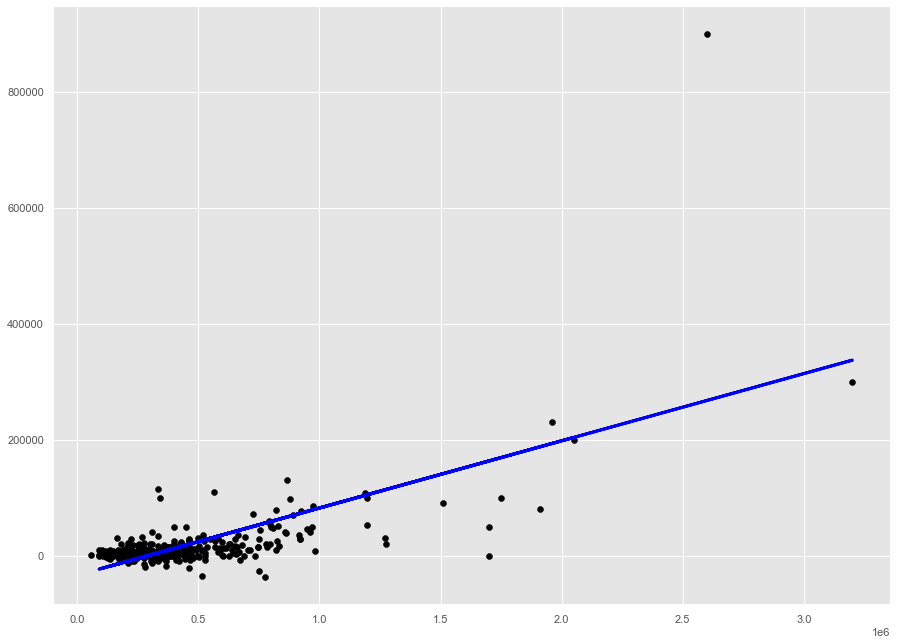

In [29]:
X = parsed_df[["SoldPrice"]]
y = parsed_df['DiffPriceAbsolute']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)
print(regressor.score(X_test, y_test))
plt.scatter(X, y, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.show()

**Your Interpretation:** TODO - answer Questions 1, 2, and 3

### Task 1.8: Incorporating a categorical variable

Above, we considered houses, townhouses, and condos together, but here we'll distinguish between them. Consider the two regression models: 
$$
\text{SoldPrice} = \beta_0 + \beta_1 \text{Prop_Type_num}
$$
and 
$$
\text{SoldPrice} = \beta_0  + \beta_1 \text{Prop_Type_num} + \beta_2 \text{TotSqf}
$$

Explian the difference between the two models and if the catgorical variable gives you any additional predictive power.

In [30]:
# your code goes here

**Your Interpretation:** TODO

# Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
* Use the pandas.read_csv() function to import the dataset. Then, **print** shape of the data and first few lines of data.
* To use [scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.values* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 
* Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.
* Print *y* array

In [31]:
df2 = pd.read_csv("OnlineNewsPopularity.csv")

In [32]:
df2 = df2.drop(['url'], axis=1)
df2 = df2.drop([' timedelta'], axis=1)

In [33]:
X = df2[[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity',]].to_numpy()


In [34]:
med = np.median(df2[[' shares']].to_numpy())
df2[' shares'].loc[df2[' shares'] < med] = 0
df2[' shares'].loc[df2[' shares'] >= med] = 1
shares = df2[[' shares']].to_numpy()

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [36]:
print(f"Min: {min(shares)}, Max: {max(shares)}, Median: {np.median(shares)}")

Min: [0], Max: [1], Median: 1.0


### Task 2.3 Classification using k-NN
Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? Plot graph of accuracy with various values of k to show your result.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, shares)
Knn_class= KNeighborsClassifier(n_neighbors=1)
n_scores = cross_val_score(Knn_class, X_train, y_train.ravel(), scoring='accuracy', n_jobs=-1)

In [62]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (n_scores.mean(), n_scores.std()))

0.55 accuracy with a standard deviation of 0.00


### Task 2.4 Classification using SVM
Develop a support vector machine classification model for the data.Show the results of cross-validation along with best parameter at the end.

Hint: SVM is more computationally expensive, so you might want to start by using only a fraction of the data, say 4,000 articles. It takes multiple minutes to run on the whole dataset.

In [63]:
linear_svm = svm.LinearSVC(max_iter=10000, dual=False).fit(X[0:8000,:], shares[0:8000].ravel())
n_scores = cross_val_score(linear_svm, X[0:8000,:], shares[0:8000].ravel(), scoring='accuracy', n_jobs=-1)

In [64]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (n_scores.mean(), n_scores.std()))

0.60 accuracy with a standard deviation of 0.00


### Task 2.5 Classification using Multinomial Logistic Regression

Develop a logistic regression model for the data. Show the results for different penalty wieghts along with the best weight for the penalty at the end. 

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', class_weight='balanced', multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, shares, verbose=1, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f std:(%.3f)' % (np.mean(n_scores), np.std(n_scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean Accuracy: 0.588 std:(0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.2s finished


### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 
Show the results of cross-validation along with best parameter at the end.
* we don't need a plot here, we only need cross validation output and the optimal setting of parameters.

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, shares, random_state=0)
tree = DecisionTreeClassifier(random_state=0)
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

model = GridSearchCV(
    estimator=tree,
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)
model.fit(X_train, y_train)
print(model.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'criterion': 'gini', 'max_depth': 6, 'max_features': 0.8, 'splitter': 'best'}


In [73]:
model.score(X_test, y_test)

0.6353546564423368

### Task 2.6 Describe your findings

1. Which method (k-NN, SVM, Multinomial Logistic Regression, Decision Tree) worked best?
+ How did different parameters influence the accuracy?
+ Which model is easiest do interpret?
+ How would you interpret your results?

**Your Interpretation:** TODO